In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")

# Loading the training data

In [3]:
train_data = pd.read_csv(r"C:\Users\hp\Downloads\archive (4)\training_data.csv")
train_data.head(10) 

Patient ID    Locations    Age     Sex  Height  Weight  Pregnancy status  \
0        2530  AV+PV+TV+MV  Child  Female    98.0   15.90             False   
1        9979  AV+PV+TV+MV  Child  Female   103.0   13.10             False   
2        9983  AV+PV+TV+MV  Child    Male   115.0   19.10             False   
3       13918  AV+PV+TV+MV  Child    Male    98.0   15.90             False   
4       14241  AV+PV+TV+MV  Child    Male    87.0   11.20             False   
5       14998  AV+PV+TV+MV  Child    Male     NaN     NaN             False   
6       23625  AV+PV+TV+MV  Child  Female    92.0   14.00             False   
7       24160  AV+PV+TV+MV  Child  Female    98.0   17.66             False   
8       29045  AV+PV+TV+MV  Child  Female    88.0   12.50             False   
9       29378        AV+MV  Child  Female    82.0   10.70             False   

    Murmur Murmur locations Most audible location  ...  \
0   Absent              NaN                   NaN  ...   
1  Present      AV+MV+PV+TV                    TV  ...   
2  Unknown              NaN                   NaN  ...   
3  Present               TV                    TV  ...   
4  Present      AV+MV+PV+TV                    PV  ...   
5   Absent              NaN                   NaN  ...   
6   Absent              NaN                   NaN  ...   
7   Absent              NaN                   NaN  ...   
8  Present      AV+MV+PV+TV                    TV  ...   
9  Unknown              NaN                   NaN  ...   

  Systolic murmur grading Systolic murmur pitch Systolic murmur quality  \
0                     NaN                   NaN                     NaN   
1                  III/VI                  High                   Harsh   
2                     NaN                   NaN                     NaN   
3                    I/VI                   Low                 Blowing   
4                   II/VI                   Low                   Harsh   
5                     NaN                   NaN                     NaN   
6                     NaN                   NaN                     NaN   
7                     NaN                   NaN                     NaN   
8                   II/VI                   Low                 Blowing   
9                     NaN                   NaN                     NaN   

  Diastolic murmur timing Diastolic murmur shape Diastolic murmur grading  \
0                     NaN                    NaN                      NaN   
1                     NaN                    NaN                      NaN   
2                     NaN                    NaN                      NaN   
3                     NaN                    NaN                      NaN   
4                     NaN                    NaN                      NaN   
5                     NaN                    NaN                      NaN   
6                     NaN                    NaN                      NaN   
7                     NaN                    NaN                      NaN   
8                     NaN                    NaN                      NaN   
9                     NaN                    NaN                      NaN   

  Diastolic murmur pitch Diastolic murmur quality Campaign Additional ID  
0                    NaN                      NaN   CC2015           NaN  
1                    NaN                      NaN   CC2015           NaN  
2                    NaN                      NaN   CC2015           NaN  
3                    NaN                      NaN   CC2015           NaN  
4                    NaN                      NaN   CC2015           NaN  
5                    NaN                      NaN   CC2015           NaN  
6                    NaN                      NaN   CC2015       50379.0  
7                    NaN                      NaN   CC2015           NaN  
8                    NaN                      NaN   CC2015           NaN  
9                    NaN                      NaN   CC2015           N

# Basic summary of the dataset


In [6]:
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                942 non-null    int64  
 1   Locations                 942 non-null    object 
 2   Age                       868 non-null    object 
 3   Sex                       942 non-null    object 
 4   Height                    826 non-null    float64
 5   Weight                    837 non-null    float64
 6   Pregnancy status          942 non-null    bool   
 7   Murmur                    942 non-null    object 
 8   Murmur locations          179 non-null    object 
 9   Most audible location     179 non-null    object 
 10  Systolic murmur timing    178 non-null    object 
 11  Systolic murmur shape     178 non-null    object 
 12  Systolic murmur grading   178 non-null    object 
 13  Systolic murmur pitch     178 non-null    object 
 14  Systolic m

# Observations from the basic summary

1. There are 22 columns in this dataset
2. Out of these columns, there exist bool, int, float, object data types
3. Only six columns do not have missing values



# Relationship between patient age and their murmur classification

             Murmur
Age                
Adolescent       69
Child           649
Infant          211
Neonate           6
Young Adult       7
*****************************************************
         Age
Murmur      
Absent   695
Present  179
Unknown   68
**********************************************
            Age   Murmur  count_total
0    Adolescent   Absent           49
1    Adolescent  Present           17
2    Adolescent  Unknown            3
3         Child   Absent          497
4         Child  Present          122
5         Child  Unknown           30
6        Infant   Absent          139
7        Infant  Present           38
8        Infant  Unknown           34
9       Neonate   Absent            4
10      Neonate  Present            1
11      Neonate  Unknown            1
12  Young Adult   Absent            6
13  Young Adult  Present            1
**************************************************


<AxesSubplot:xlabel='Age', ylabel='count_total'>

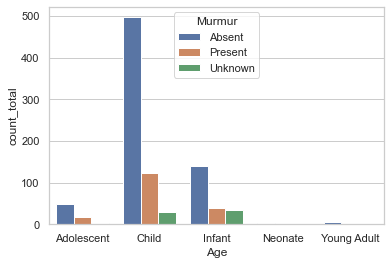

In [172]:
#extract age and murmurs from the training data
patient_age = train_data['Age'].fillna(method='ffill', inplace = True) #filling the 74 missing values in 'age' column
age_murmur = train_data.loc[:, ['Age', 'Murmur']]

#group by age
by_age = age_murmur.groupby('Age').count()
print(by_age)
print('*****************************************************')

#group by murmur
by_murmur = age_murmur.groupby('Murmur').count()
print(by_murmur)
print('**********************************************')

#by both murmur and age and add a total column then plot
by_murmur_age = age_murmur.groupby(['Age','Murmur']).size()
by_murmur_age.name= 'count_total'
by_murmur_age = by_murmur_age.reset_index()
print(by_murmur_age)
print('**************************************************')

sns.barplot(x='Age', y='count_total', hue='Murmur', data=by_murmur_age)

# Observations from the relationship between patient age and their murmur classification

1. Age has 74 missing values, which we filled using forward filling method.
2. Age is categorized into five broad 'categories', and its an object type not an int
3. Many of the heart murmurs belong to children and infants


# Relationship between sex and murmur classification


      Sex   Murmur
0  Female   Absent
1  Female  Present
2    Male  Unknown
3    Male  Present
4    Male  Present
***********************************
        Murmur
Sex           
Female     486
Male       456
*************************************
         Sex
Murmur      
Absent   695
Present  179
Unknown   68
**************************************
      Sex   Murmur  Total
0  Female   Absent    355
1  Female  Present     92
2  Female  Unknown     39
3    Male   Absent    340
4    Male  Present     87
5    Male  Unknown     29


<AxesSubplot:xlabel='Sex', ylabel='Total'>

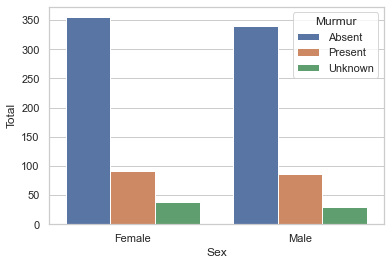

In [134]:
#extract the sex and murmur and put them into a dataframe
sex_murmur = train_data.loc[:,['Sex','Murmur']]
print(sex_murmur.head())
print('***********************************')

#groupby Sex
by_sex = sex_murmur.groupby('Sex').count()
print(by_sex)
print('*************************************')

#groupby murmur
by_murmur = sex_murmur.groupby('Murmur').count()
print(by_murmur)
print('**************************************')

#groupby both murmur and sex then count each group the plot
by_both = sex_murmur.groupby(['Sex','Murmur'])
count_groups = by_both.size() #count the values in the group
count_groups.name = 'Total' #add column total
count_groups = count_groups.reset_index()
print(count_groups)

sns.barplot(x='Sex', y='Total', hue='Murmur', data=count_groups)

# Observations from the relationship between the sex and murmur classification

1. There is more data on female than male. 
2. Most female and male dont have murmurs (murmurs classified as absent)
3. There is a small number of male and female whose hearts' sounds were not identified as with or without murmurs (Murmur classified as unknown)
4. Data about patient sex and their corresponding murmur classification existed (that is no missing data).

# Relationship between the body mass index (BMI) of the patients and their murmur classification



   Height  Weight   Murmur
0    98.0   15.90   Absent
1   103.0   13.10  Present
2   115.0   19.10  Unknown
3    98.0   15.90  Present
4    87.0   11.20  Present
5     NaN     NaN   Absent
6    92.0   14.00   Absent
7    98.0   17.66   Absent
8    88.0   12.50  Present
9    82.0   10.70  Unknown
****************************************************
0    16.555602
1    12.348006
2    14.442344
3    16.555602
4    14.797199
dtype: float64
**************************************************
   Height  Weight   Murmur        bmi
0    98.0    15.9   Absent  16.555602
1   103.0    13.1  Present  12.348006
2   115.0    19.1  Unknown  14.442344
3    98.0    15.9  Present  16.555602
4    87.0    11.2  Present  14.797199
**************************************************
The lenght of weight column is 942
While the length of height column is 942
The length of bmi column is 942
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941

<AxesSubplot:xlabel='bmi', ylabel='Murmur'>

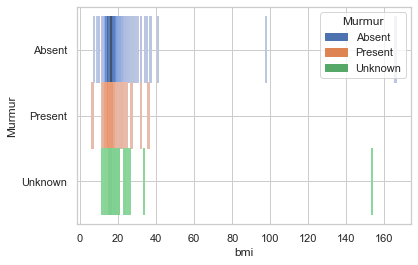

In [42]:
#slice the height, weight and murmur columns
height_weight_murmur = train_data.loc[:,['Height','Weight','Murmur']]
print(height_weight_murmur.head(10))
print('****************************************************')


#calculate bmi using the height and weight
weight = height_weight_murmur['Weight']
height = height_weight_murmur['Height']
bmi = weight/(height/100*height/100)
print(bmi.head())
print('**************************************************')

#add a bmi column on our new data frame
height_weight_murmur.name = 'bmi'
height_weight_murmur['bmi'] = bmi
print(height_weight_murmur.head())
print('**************************************************')

print("The lenght of weight column is " + str(len(weight)))
print("While the length of height column is " + str(len(height)))
print('The length of bmi column is '+ str(len(bmi)))
print('**************************************************')

#basic statistics of this dataframe
print(height_weight_murmur.info())
print('**************************************************')
print(height_weight_murmur.describe())

#plot of bmi vs murmur classifications
sns.histplot(x='bmi', y='Murmur', hue='Murmur', data=height_weight_murmur, bins='auto')




# Observations from the relationship between BMI and murmur classification

1. The mean bmi is 17. This is an underweight value.
2. We have outlier bmi values. That is values way above the normal value.
3. We have some missing values.

# Relationship between murmur location and the number of present murmur in that location


    Murmur Murmur locations
0   Absent              NaN
1  Present      AV+MV+PV+TV
2  Unknown              NaN
3  Present               TV
4  Present      AV+MV+PV+TV
5   Absent              NaN
6   Absent              NaN
7   Absent              NaN
8  Present      AV+MV+PV+TV
9  Unknown              NaN
********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Murmur            942 non-null    object
 1   Murmur locations  179 non-null    object
dtypes: object(2)
memory usage: 14.8+ KB
None
*********************************************
   Murmur locations  number of present murmur in this location
0                AV                                          2
1             AV+MV                                         19
2          AV+MV+PV                                          2
3   AV+MV+PV+Ph

<AxesSubplot:xlabel='number of present murmur in this location', ylabel='Murmur locations'>

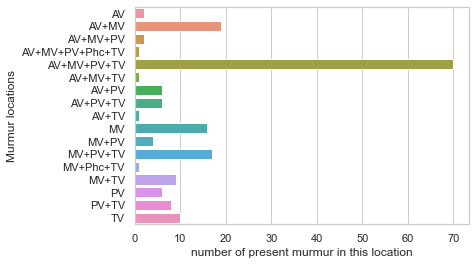

In [121]:
#slice the two columns- murmur location and murmur classification
location_class = train_data.loc[:,['Murmur','Murmur locations']]
print(location_class.head(10))
print('********************************************')

#basic statistics about the two columns
print(location_class.info())
print('*********************************************')

#slice where the rows where murmur is present
by_murmur = location_class.groupby('Murmur locations').size()
by_murmur.name = 'number of present murmur in this location'
by_murmur = by_murmur.reset_index()
print(by_murmur)

sns.barplot(y='Murmur locations', x='number of present murmur in this location', data=by_murmur)

# Observations from the relationship between murmur location and the number of present murmur in that location.

1. The sum of the four locations (AV, MV, PV and TV) had the highest number classified as present murmur.
2. There exist many missing values in the 'murmur location' column

# Relationship betweeen most audible murmur and murmur location

    Murmur Most audible location
0   Absent                   NaN
1  Present                    TV
2  Unknown                   NaN
3  Present                    TV
4  Present                    PV
5   Absent                   NaN
6   Absent                   NaN
7   Absent                   NaN
8  Present                    TV
9  Unknown                   NaN
******************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Murmur                 942 non-null    object
 1   Most audible location  179 non-null    object
dtypes: object(2)
memory usage: 14.8+ KB
None
******************************************************
  Most audible location  sum_total
0                    AV         19
1                    MV         42
2                    PV         62
3                    TV         5

<AxesSubplot:xlabel='Most audible location', ylabel='sum_total'>

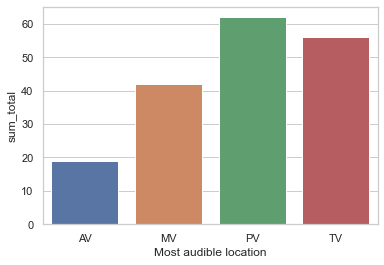

In [114]:
#slice the two columns
audible_murmur = train_data.loc[:,['Murmur', 'Most audible location']]
print(audible_murmur.head(10))
print('******************************************************')
print(audible_murmur.info())
print('******************************************************')

#select only columns with present murmur
by_audiblelocation = only_present_murmurs.groupby('Most audible location').size()
by_audiblelocation.name = 'sum_total'
by_audiblelocation = by_audiblelocation.reset_index()
print(by_audiblelocation)

sns.barplot(x='Most audible location', y='sum_total', data=by_audiblelocation)

# Observation from the analysis of the relationship betweeen most audible murmur and murmur location

1. PV is the location with the most audible murmurs at 62 out of 179 murmurs
2. We have many missing 'most audible murmur location' values.